In [28]:
import os
import numpy as np
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
os.environ["CUDA_VISIBLE_DEVICE"] = "-1"

In [30]:
tf.keras.backend.clear_session()

In [31]:
with open("data_batch_1","rb") as f:
    batch = pickle.load(f, encoding = "bytes")

In [32]:
X = batch[b'data']
y = np.array(batch[b'labels'])

In [33]:
X_images = X.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

In [34]:
label_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

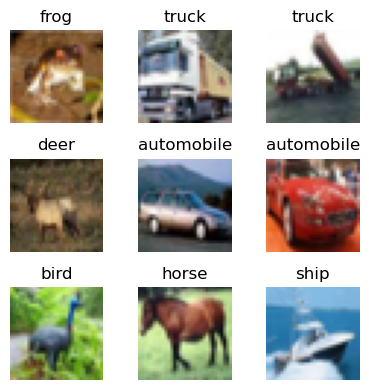

In [35]:
plt.figure(figsize = (4, 4))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_images[i])
    plt.title(label_names[y[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [36]:
X_images = X.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1).astype("float32")/255.0

In [37]:
num_classes = 10
y_cat = tf.keras.utils.to_categorical(y, num_classes = num_classes)

In [38]:
X_train, y_train = X_images[:2000], y_cat[:2000]
X_test, y_test = X_images[2000:2500], y_cat[2000:2500]

In [39]:
print("train_set: ",X_train.shape, y_train.shape)
print("test_set: ",X_test.shape, y_test.shape)

train_set:  (2000, 32, 32, 3) (2000, 10)
test_set:  (500, 32, 32, 3) (500, 10)


In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (32, 32, 3)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(num_classes, activation = 'softmax')
])

In [41]:
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])


In [42]:
history = model.fit(X_train, y_train,
                   epochs = 5,
                   batch_size = 32,
                   validation_data = (X_test, y_test),
                   verbose = 1)

Epoch 1/5
63/63 [==============================] - 1s 3ms/step - loss: 2.2708 - accuracy: 0.1510 - val_loss: 2.1660 - val_accuracy: 0.1960
Epoch 2/5
63/63 [==============================] - 0s 2ms/step - loss: 2.0840 - accuracy: 0.2420 - val_loss: 2.0760 - val_accuracy: 0.2640
Epoch 3/5
63/63 [==============================] - 0s 2ms/step - loss: 1.9953 - accuracy: 0.2855 - val_loss: 1.9862 - val_accuracy: 0.2640
Epoch 4/5
63/63 [==============================] - 0s 2ms/step - loss: 1.8992 - accuracy: 0.3095 - val_loss: 1.9749 - val_accuracy: 0.2960
Epoch 5/5
63/63 [==============================] - 0s 2ms/step - loss: 1.8773 - accuracy: 0.3255 - val_loss: 1.9581 - val_accuracy: 0.2920


In [43]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose = 0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 0)

In [44]:
print(train_loss)

1.846036672592163


In [45]:
print(train_acc)

0.32899999618530273


In [46]:
print(test_loss)

1.9581340551376343


In [47]:
print(test_acc)

0.2919999957084656


In [48]:
print(f"Training_Accuracy: {train_acc:.4f}, Training_loss: {train_loss:.4f}")
print(f"Test_Accuracy: {test_acc:.4f}, Test_loss: {test_loss:.4f}")

Training_Accuracy: 0.3290, Training_loss: 1.8460
Test_Accuracy: 0.2920, Test_loss: 1.9581


In [49]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis = 1)
y_true = np.argmax(y_test, axis = 1)

16/16 [==============================] - 0s 1ms/step


<Axes: >

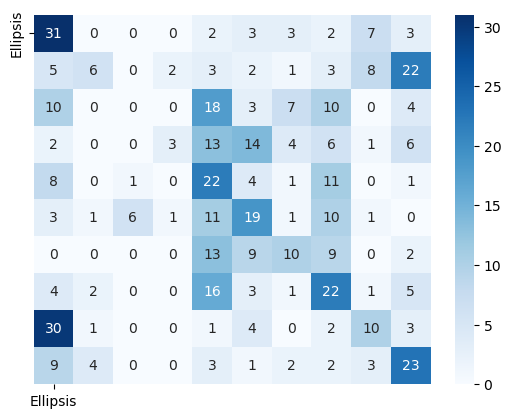

In [50]:
import seaborn as sns
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=[...], yticklabels=[...])


In [51]:
print(classification_report(y_true, y_pred, target_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]))

              precision    recall  f1-score   support

    airplane       0.30      0.61      0.41        51
  automobile       0.43      0.12      0.18        52
        bird       0.00      0.00      0.00        52
         cat       0.50      0.06      0.11        49
        deer       0.22      0.46      0.29        48
         dog       0.31      0.36      0.33        53
        frog       0.33      0.23      0.27        43
       horse       0.29      0.41      0.34        54
        ship       0.32      0.20      0.24        51
       truck       0.33      0.49      0.40        47

    accuracy                           0.29       500
   macro avg       0.30      0.29      0.26       500
weighted avg       0.30      0.29      0.26       500

